<a href="https://colab.research.google.com/github/mohammadardha/earthengine-api/blob/master/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio
!pip install ipygee
!pip install tslearn
!pip install earthengine-api
!pip install geopandas

In [ ]:
import ee
ee.Authenticate()
ee.Initialize()

In [ ]:
# Folium setup.
import folium
from folium import plugins
from IPython.display import Image
import geopandas as gpd
import json
print(folium.__version__)
from ipygee import*
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt  
import seaborn as sns

0.8.3


In [ ]:
AOI = ee.FeatureCollection("users/anisa/shp-per-pulau/PulauJawa")

In [1]:
samples = ee.FeatureCollection(
        [ee.Feature(
            ee.Geometry.Point([-52.22498595583074, -21.023063098218522]),
            {
              "system:index": "0"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.25073516237371, -21.00864125751404]),
            {
              "system:index": "1"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.230822442647145, -21.033317780716285]),
            {
              "system:index": "2"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.24695861208074, -21.06696099934238]),
            {
              "system:index": "3"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.26343810426824, -21.031074629212196]),
            {
              "system:index": "4"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.2613781677448, -21.01569210943256]),
            {
              "system:index": "5"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.33656585085027, -20.95671109236073]),
            {
              "system:index": "6"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.35201537477605, -20.941320912027972]),
            {
              "system:index": "7"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.40626036989324, -20.91502569431259]),
            {
              "system:index": "8"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.43029296266668, -20.925929149515145]),
            {
              "system:index": "9"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.459818719502614, -20.92079821057918]),
            {
              "system:index": "10"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.48694121706121, -20.91406358665759]),
            {
              "system:index": "11"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.42102324831121, -21.059912573708093]),
            {
              "system:index": "12"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.340685723897145, -21.051582185665765]),
            {
              "system:index": "13"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.21399962770574, -20.935228528502524]),
            {
              "system:index": "14"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.20781981813543, -20.911497936061707]),
            {
              "system:index": "15"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.241808770772145, -20.903479995030743]),
            {
              "system:index": "16"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.25451171266668, -20.884235188282084]),
            {
              "system:index": "17"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.23494231569402, -21.144471618006524]),
            {
              "system:index": "18"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.131945489522145, -21.010564250180387]),
            {
              "system:index": "19"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.03924834596746, -20.995820673066977]),
            {
              "system:index": "20"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.98294341432683, -20.903479995030743]),
            {
              "system:index": "21"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.94723784792058, -20.84702156919366]),
            {
              "system:index": "22"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.917712091084645, -20.838037591656004]),
            {
              "system:index": "23"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.939684747334645, -20.92464643125095]),
            {
              "system:index": "24"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.90741240846746, -20.957352315525075]),
            {
              "system:index": "25"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.87514006960027, -20.91438428989525]),
            {
              "system:index": "26"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.862780450459645, -20.89963123110268]),
            {
              "system:index": "27"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.829821466084645, -20.87140394663634]),
            {
              "system:index": "28"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.82501494752996, -20.850871681087703]),
            {
              "system:index": "29"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.81402861940496, -20.89193340708438]),
            {
              "system:index": "30"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.794115899678395, -20.877178141007942]),
            {
              "system:index": "31"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.824328302022145, -20.95671109236073]),
            {
              "system:index": "32"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.91359221803777, -21.081056848549906]),
            {
              "system:index": "33"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.90191924440496, -21.07657195057746]),
            {
              "system:index": "34"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.09280669557683, -21.134224602924093]),
            {
              "system:index": "35"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.26309478151433, -21.22130162098234]),
            {
              "system:index": "36"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.38875090944402, -20.83867932212207]),
            {
              "system:index": "37"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.22395598756902, -21.393383426221565]),
            {
              "system:index": "38"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.31184661256902, -21.287215489572976]),
            {
              "system:index": "39"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.35029876100652, -21.383153720977568]),
            {
              "system:index": "40"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.75497710573308, -20.644752690949435]),
            {
              "system:index": "41"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.728197930928395, -20.647965417897122]),
            {
              "system:index": "42"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.816088555928395, -20.803380085663974]),
            {
              "system:index": "43"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.70828521120183, -20.836112383843435]),
            {
              "system:index": "44"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.14087188112371, -20.688439958333003]),
            {
              "system:index": "45"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.049548028584645, -20.69422115476127]),
            {
              "system:index": "46"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.31709694350789, -20.582136033548824]),
            {
              "system:index": "47"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.122776264796954, -20.469601761643155]),
            {
              "system:index": "48"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.460605854640704, -20.72605882624338]),
            {
              "system:index": "49"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.55604958022664, -20.749176548242982]),
            {
              "system:index": "50"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.60823463882039, -20.67274618799024]),
            {
              "system:index": "51"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.551243061671954, -20.569922033796818]),
            {
              "system:index": "52"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.60136818374227, -20.506908000619493]),
            {
              "system:index": "53"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.595188374171954, -20.49211523325497]),
            {
              "system:index": "54"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.31915688003133, -20.605275667342248]),
            {
              "system:index": "55"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.18273548767845, -20.688168997620203]),
            {
              "system:index": "56"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.15183643982689, -20.701336981233155]),
            {
              "system:index": "57"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.2374954669265, -20.720123465666497]),
            {
              "system:index": "58"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.143425032356184, -20.7385865432334]),
            {
              "system:index": "59"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.13037876770775, -20.685599501681814]),
            {
              "system:index": "60"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.144111677864, -20.671787715671524]),
            {
              "system:index": "61"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.03339008972923, -20.68190577504366]),
            {
              "system:index": "62"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.404283186109325, -20.407603132723523]),
            {
              "system:index": "63"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.38883366218354, -20.39859318739168]),
            {
              "system:index": "64"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.489427229078075, -20.44556782296092]),
            {
              "system:index": "65"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.59070744148042, -20.50764239797433]),
            {
              "system:index": "66"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.626756330640575, -20.52629202271895]),
            {
              "system:index": "67"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.63465275398042, -20.542528207379764]),
            {
              "system:index": "68"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.642205854566356, -20.44186828645125]),
            {
              "system:index": "69"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.57491459480073, -20.374939574449932]),
            {
              "system:index": "70"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.730096479566356, -20.524523621325788]),
            {
              "system:index": "71"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.73421635261323, -20.5106972334466]),
            {
              "system:index": "72"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.74039616218354, -20.503622784799457]),
            {
              "system:index": "73"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.8258835279062, -20.52098675723965]),
            {
              "system:index": "74"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.819017072828075, -20.511018791531008]),
            {
              "system:index": "75"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.909654279859325, -20.483362329595053]),
            {
              "system:index": "76"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.91995396247651, -20.47692987921427]),
            {
              "system:index": "77"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.94913639655854, -20.465350788975783]),
            {
              "system:index": "78"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.99170841804292, -20.406798694746396]),
            {
              "system:index": "79"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.8258835279062, -20.42932136929195]),
            {
              "system:index": "80"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.82107700935151, -20.418703947637233]),
            {
              "system:index": "81"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.08200230232026, -20.420634442430007]),
            {
              "system:index": "82"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.08886875739839, -20.41580816004643]),
            {
              "system:index": "83"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.10843815437104, -20.44605036463639]),
            {
              "system:index": "84"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.10397495857026, -20.448945582871453]),
            {
              "system:index": "85"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.8478561841562, -20.39296170397543]),
            {
              "system:index": "86"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.79395451179292, -20.51744981143009]),
            {
              "system:index": "87"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.78846134773042, -20.52902496649481]),
            {
              "system:index": "88"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.743829389722606, -20.479824515263]),
            {
              "system:index": "89"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.75721897712495, -20.451197381563805]),
            {
              "system:index": "90"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.67550816169526, -20.440259764544045]),
            {
              "system:index": "91"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.214473230496104, -20.235674466529048]),
            {
              "system:index": "92"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.19490383352345, -20.226332353940943]),
            {
              "system:index": "93"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.32914303030079, -20.23470806712322]),
            {
              "system:index": "94"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.29893062795704, -20.24855921767621]),
            {
              "system:index": "95"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.2141299077422, -20.198947067118787]),
            {
              "system:index": "96"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.16194484914845, -20.178002127056484]),
            {
              "system:index": "97"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.15267513479298, -20.172201492155704]),
            {
              "system:index": "98"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.13516567434376, -20.166400641501728]),
            {
              "system:index": "99"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.16606472219532, -20.223432963487614]),
            {
              "system:index": "100"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.357982141628916, -20.278834174860553]),
            {
              "system:index": "101"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.37411831106251, -20.259188332800754]),
            {
              "system:index": "102"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.49393795217579, -20.316186613329936]),
            {
              "system:index": "103"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.504580957546885, -20.313932842276053]),
            {
              "system:index": "104"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.50973079885548, -20.178646628725108]),
            {
              "system:index": "105"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.48192165578907, -20.186058206398357]),
            {
              "system:index": "106"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.45376918996876, -20.173812801272245]),
            {
              "system:index": "107"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.39506099905079, -20.291071310354106]),
            {
              "system:index": "108"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.3899111577422, -20.293325414146782]),
            {
              "system:index": "109"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.38167141164845, -20.30362947099264]),
            {
              "system:index": "110"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.425960046902354, -20.334215599916117]),
            {
              "system:index": "111"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.4448427983672, -20.3422635760268]),
            {
              "system:index": "112"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.58457515920704, -20.263053285153696]),
            {
              "system:index": "113"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.56740902151173, -20.243405445440324]),
            {
              "system:index": "114"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.77735032032575, -21.019325548961124]),
            {
              "system:index": "115"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.76636399220075, -20.935978042596908]),
            {
              "system:index": "116"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.78696335743513, -20.90390894294657]),
            {
              "system:index": "117"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.786276711927314, -20.93661935458863]),
            {
              "system:index": "118"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.78970993946638, -21.02060745499257]),
            {
              "system:index": "119"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.802756204114814, -21.04367987839804]),
            {
              "system:index": "120"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.81236924122419, -20.92956477164623]),
            {
              "system:index": "121"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.82060898731794, -20.93213011297734]),
            {
              "system:index": "122"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.83777512501325, -20.908399029890997]),
            {
              "system:index": "123"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.79863633106794, -20.938543274085493]),
            {
              "system:index": "124"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.76636399220075, -20.898135776536993]),
            {
              "system:index": "125"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.231467141614814, -20.72098439596886]),
            {
              "system:index": "126"
            }),
        ee.Feature(
            ee.Geometry.Point([-54.16736496876325, -20.729333149411726]),
            {
              "system:index": "127"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.99285782764997, -21.406597045645434]),
            {
              "system:index": "128"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.016203774915596, -21.413948539809855]),
            {
              "system:index": "129"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.01551712940778, -21.44335081640908]),
            {
              "system:index": "130"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.00418747852888, -21.435681228250722]),
            {
              "system:index": "131"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.95921219776716, -21.445907256197813]),
            {
              "system:index": "132"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.94925583790388, -21.435042077707198]),
            {
              "system:index": "133"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.04881943653669, -21.400843444429174]),
            {
              "system:index": "134"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.99491776417341, -21.36759598285688]),
            {
              "system:index": "135"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.9405725520584, -21.549253882578537]),
            {
              "system:index": "136"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.93370609698027, -21.5530857348114]),
            {
              "system:index": "137"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.88667087969512, -21.547657247611454]),
            {
              "system:index": "138"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.8691614192459, -21.548934556990712]),
            {
              "system:index": "139"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.86195164141387, -21.567773563900847]),
            {
              "system:index": "140"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.843755535456836, -21.587567848340857]),
            {
              "system:index": "141"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.94434910235137, -21.4431992221726]),
            {
              "system:index": "142"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.87832471698773, -20.18663804250069]),
            {
              "system:index": "143"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.74683210224163, -20.184382390647126]),
            {
              "system:index": "144"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.80725690692913, -20.171170060024803]),
            {
              "system:index": "145"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.821676462593196, -20.18212670614791]),
            {
              "system:index": "146"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.822706430854915, -20.239153269157235]),
            {
              "system:index": "147"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.77017804950726, -20.251071434176065]),
            {
              "system:index": "148"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.887594431343196, -20.200493473214916]),
            {
              "system:index": "149"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.84570905536663, -20.14667595054818]),
            {
              "system:index": "150"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.85600873798382, -20.14441972084767]),
            {
              "system:index": "151"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.795240610542415, -20.206293054989374]),
            {
              "system:index": "152"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.80313703388226, -20.212736781338315]),
            {
              "system:index": "153"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.79867383808148, -20.210159322811435]),
            {
              "system:index": "154"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.75163862079632, -20.184704628624996]),
            {
              "system:index": "155"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.7506086525346, -20.133782770457568]),
            {
              "system:index": "156"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.68640729755413, -20.160534932069453]),
            {
              "system:index": "157"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.679884165229915, -20.160857219325145]),
            {
              "system:index": "158"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.53912183612835, -20.18567133856106]),
            {
              "system:index": "159"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.70903194212359, -19.741586993703617]),
            {
              "system:index": "160"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.786279561752494, -19.76226688089398]),
            {
              "system:index": "161"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.695642354721244, -19.694400978279504]),
            {
              "system:index": "162"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.56964290403765, -19.780682648041594]),
            {
              "system:index": "163"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.392488363022025, -19.70603717968956]),
            {
              "system:index": "164"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.40107143186968, -19.701188865268374]),
            {
              "system:index": "165"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.088069445593646, -19.984163079397348]),
            {
              "system:index": "166"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.049617297156146, -19.929302987462915]),
            {
              "system:index": "167"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.184199816687396, -19.918974249956214]),
            {
              "system:index": "168"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.274150378210834, -19.873778093474467]),
            {
              "system:index": "169"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.43150205464873, -19.834476740895887]),
            {
              "system:index": "170"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.450384806113576, -19.83302343342292]),
            {
              "system:index": "171"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.450384806113576, -19.84077425295329]),
            {
              "system:index": "172"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.40935773702178, -19.819943067958445]),
            {
              "system:index": "173"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.41055936666045, -19.838190688471677]),
            {
              "system:index": "174"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.33520002217803, -19.838513636330493]),
            {
              "system:index": "175"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.37382383199248, -19.87645543526845]),
            {
              "system:index": "176"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.866078364810754, -20.056392888493303]),
            {
              "system:index": "177"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.890797603092004, -20.068002535628384]),
            {
              "system:index": "178"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.789174067935754, -20.087672475869567]),
            {
              "system:index": "179"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.81766985650997, -20.06477771982514]),
            {
              "system:index": "180"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.84513567682247, -20.05800539085526]),
            {
              "system:index": "181"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.018856990299035, -20.061230345869983]),
            {
              "system:index": "182"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.99310778375607, -20.07090481316085]),
            {
              "system:index": "183"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.86161516900997, -20.103471131393338]),
            {
              "system:index": "184"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.8959474444006, -19.99607341247102]),
            {
              "system:index": "185"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.85440539117794, -19.98284519484165]),
            {
              "system:index": "186"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.98486803766232, -20.020591071415]),
            {
              "system:index": "187"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.867794978580285, -20.030590598171695]),
            {
              "system:index": "188"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.690297114810754, -20.02801013603307]),
            {
              "system:index": "189"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.70197008844357, -20.04607248108756]),
            {
              "system:index": "190"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.914070903124376, -20.454704968030963]),
            {
              "system:index": "191"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.83922654277281, -20.51613275377036]),
            {
              "system:index": "192"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.94943314677672, -20.474647574220082]),
            {
              "system:index": "193"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.93776017314391, -20.486547572383518]),
            {
              "system:index": "194"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.944283305468126, -20.45760002318145]),
            {
              "system:index": "195"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.964539347948595, -20.525135805270565]),
            {
              "system:index": "196"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.80043107158141, -20.57978581357078]),
            {
              "system:index": "197"
            }),
        ee.Feature(
            ee.Geometry.Point([-54.133797465624376, -20.504878194933717]),
            {
              "system:index": "198"
            }),
        ee.Feature(
            ee.Geometry.Point([-54.04213029033141, -20.483331447698276]),
            {
              "system:index": "199"
            }),
        ee.Feature(
            ee.Geometry.Point([-53.9648826707025, -20.447306245886427]),
            {
              "system:index": "200"
            }),
        ee.Feature(
            ee.Geometry.Point([-54.13517075664, -20.552141781395886]),
            {
              "system:index": "201"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.92152785092682, -20.78872182870366]),
            {
              "system:index": "202"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.93835066586823, -20.778771402302095]),
            {
              "system:index": "203"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.98023604184479, -20.78069734246756]),
            {
              "system:index": "204"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.908481586278384, -20.79802969823621]),
            {
              "system:index": "205"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.92358778745026, -20.792894392947545]),
            {
              "system:index": "206"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.23580049754944, -20.55626036512568]),
            {
              "system:index": "207"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.18842195751038, -20.570082634063485]),
            {
              "system:index": "208"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.24507021190491, -20.50063721128871]),
            {
              "system:index": "209"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.184988729971316, -20.54983097668342]),
            {
              "system:index": "210"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.207991354483035, -20.48359254814845]),
            {
              "system:index": "211"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.12319063426819, -20.483914163104334]),
            {
              "system:index": "212"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.10568117381897, -20.496778208242215]),
            {
              "system:index": "213"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.96697878124085, -20.60479351088411]),
            {
              "system:index": "214"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.29725527049866, -20.590652996085264]),
            {
              "system:index": "215"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.47269319774475, -20.532148764053243]),
            {
              "system:index": "216"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.51698183299866, -20.59129577520949]),
            {
              "system:index": "217"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.83058547669085, -20.39978311728478]),
            {
              "system:index": "218"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.752307888800225, -20.38980728308718]),
            {
              "system:index": "219"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.76398086243304, -20.38594549650018]),
            {
              "system:index": "220"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.77359389954241, -20.39527798180641]),
            {
              "system:index": "221"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.7454414337221, -20.379508970573948]),
            {
              "system:index": "222"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.82131576233538, -20.38819821709894]),
            {
              "system:index": "223"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.847408291632256, -20.393668972929085]),
            {
              "system:index": "224"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.85633468323382, -20.401070274655066]),
            {
              "system:index": "225"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.905086514288506, -20.390772714618098]),
            {
              "system:index": "226"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.895130154425225, -20.395921580653468]),
            {
              "system:index": "227"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.89341354065569, -20.38916365870733]),
            {
              "system:index": "228"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.86697768860491, -20.444827222744376]),
            {
              "system:index": "229"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.851184841925225, -20.437749736692002]),
            {
              "system:index": "230"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.778743740851006, -20.463484487228673]),
            {
              "system:index": "231"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.682613369757256, -20.453512782933156]),
            {
              "system:index": "232"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.95486831360491, -20.44289703159173]),
            {
              "system:index": "233"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.95761489563616, -20.43549774098322]),
            {
              "system:index": "234"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.94937514954241, -20.427454629954322]),
            {
              "system:index": "235"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.96310805969866, -20.38079629725138]),
            {
              "system:index": "236"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.04996871643694, -20.35601337185561]),
            {
              "system:index": "237"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.03211593323382, -20.351185066185394]),
            {
              "system:index": "238"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.06232833557757, -20.414263017545426]),
            {
              "system:index": "239"
            }),
        ee.Feature(
            ee.Geometry.Point([-52.04584884339007, -20.45126101817541]),
            {
              "system:index": "240"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.92019271546038, -20.357300894540536]),
            {
              "system:index": "241"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.79419326477679, -20.346034707115294]),
            {
              "system:index": "242"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.737545010382256, -20.382405440487204]),
            {
              "system:index": "243"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.68844985657366, -20.340240347944377]),
            {
              "system:index": "244"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.69977950745257, -20.34184991395169]),
            {
              "system:index": "245"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.70870589905413, -20.339918432731398]),
            {
              "system:index": "246"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.591976162726006, -20.408792993015783]),
            {
              "system:index": "247"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.564510342413506, -20.427132896765023]),
            {
              "system:index": "248"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.556270596319756, -20.402035635625264]),
            {
              "system:index": "249"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.48966598206194, -20.36277274617902]),
            {
              "system:index": "250"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.46803664856585, -20.37629060687237]),
            {
              "system:index": "251"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.822689053351006, -20.47538535109249]),
            {
              "system:index": "252"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.8223457305971, -20.45383446091861]),
            {
              "system:index": "253"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.58153149876736, -19.949467061179252]),
            {
              "system:index": "254"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.62582013402127, -19.937848667038697]),
            {
              "system:index": "255"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.5945777634158, -19.87102632750058]),
            {
              "system:index": "256"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.60762402806424, -19.974314644370292]),
            {
              "system:index": "257"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.64023968968533, -19.97979994684889]),
            {
              "system:index": "258"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.60453412327908, -19.99270578772635]),
            {
              "system:index": "259"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.62856671605252, -19.900405807461137]),
            {
              "system:index": "260"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.760745976306424, -19.93591218491091]),
            {
              "system:index": "261"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.46995160374783, -19.95075794108595]),
            {
              "system:index": "262"
            }),
        ee.Feature(
            ee.Geometry.Point([-51.37759778294705, -19.926874954463585]),
            {
              "system:index": "263"
            })]);

NameError: ignored

In [ ]:
#heigth = ee.Image('users/potapovpeter/GEDI_V27/GEDI_SAM_v27').clip(AOI)
#mapbiomas = ee.Image('projects/mapbiomas-workspace/public/collection5/mapbiomas_collection50_integration_v1')
mapbiomas_2019 =  mapbiomas.select('classification_2019')

In [ ]:
mask_2019 = mapbiomas_2019.eq(9)
filterdate = ee.Filter.date('2019-5-10','2019-7-25');
S2 = ee.ImageCollection("UCSB-CHG/CHIRPS/DAILY").filter(filterdate).filterBounds(AOI)

In [ ]:
img = ee.Image(S2.median()).clip(AOI).divide(10000);

In [ ]:
bands = ['precipitation']
img = img.select(bands).float(); 
#img = img.updateMask(mask_2019)

In [ ]:
#heigth = heigth.updateMask(mask_2019)

In [ ]:
basemaps = {
    'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
    ),
    'Google Satellite': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Google Terrain': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = True,
        control = True
    ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    )
}

In [ ]:
vis_params = {'min': 0, 'max': 0.2, 'bands': ['B4', 'B3','B2']}
GFCHParams = {'min': 0, 'max': 40, 'palette': ['white', 'green']};

In [ ]:
def add_ee_layer(self, ee_object, vis_params, name):
    
    try:    
        # display ee.Image()
        if isinstance(ee_object, ee.image.Image):    
            map_id_dict = ee.Image(ee_object).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
            ).add_to(self)
        # display ee.ImageCollection()
        elif isinstance(ee_object, ee.imagecollection.ImageCollection):    
            ee_object_new = ee_object.mosaic()
            map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
            ).add_to(self)
        # display ee.Geometry()
        elif isinstance(ee_object, ee.geometry.Geometry):    
            folium.GeoJson(
            data = ee_object.getInfo(),
            name = name,
            overlay = True,
            control = True
        ).add_to(self)
        # display ee.FeatureCollection()
        elif isinstance(ee_object, ee.featurecollection.FeatureCollection):  
            ee_object_new = ee.Image().paint(ee_object, 0, 2)
            map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
        ).add_to(self)
    
    except:
        print("Could not display {}".format(name))
    
# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

In [ ]:
my_map = folium.Map(location=[-20.838318,-51.816395], zoom_start=10)

# Add custom basemaps
basemaps['Google Maps'].add_to(my_map)

# Add the elevation model to the map object.
my_map.add_ee_layer(img, vis_params, 'AOI Sentinel 2')
my_map.add_ee_layer(heigth, GFCHParams, 'Global Forest Canopy Height 2019')
my_map.add_child(folium.LayerControl())

# Display the map.
display(my_map)

In [ ]:
collectionVV = ee.ImageCollection('COPERNICUS/S1_GRD').filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV')).filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING')).filterBounds(AOI).filter(dry2019Filter).select(['VV']);

collectionVH = ee.ImageCollection('COPERNICUS/S1_GRD').filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING')).filterBounds(AOI).filter(dry2019Filter).select(['VH']);

VV = ee.Image(collectionVV.median()).clip(AOI).rename('VV');
VH = ee.Image(collectionVH.median()).clip(AOI).rename('VH');



S1 = VV.addBands(VH)
S1 = S1.updateMask(mask_2019)

In [ ]:
full_image = img.addBands(S1).addBands(heigth.select('b1').float().rename('GFCH'))

In [ ]:
list_bands = full_image.bandNames().getInfo()

In [ ]:
collect = ee.ImageCollection([])
for i in range(len(list_bands)):
  band = full_image.select([list_bands[i]]).rename('B0').set('band',i)
  collectionFromImages = ee.ImageCollection.fromImages([band])
  collect = collect.merge(collectionFromImages)

In [ ]:
df_points = pd.DataFrame([])
for n in range(1,samples.size().getInfo() + 1):
  feat = ee.Geometry.Point(samples.getInfo()["features"][n-1]['geometry']['coordinates'])
  print(n)
  point_ndvi = chart.Image.series(**{'imageCollection': collect,
                                   'region': feat,
                                   'reducer': ee.Reducer.mean(),
                                   'bands' : 'B0',
                                   'scale': 20,
                                   'xProperty': 'band'})
  df = point_ndvi.dataframe
  df = df.transpose().copy() 
  df_points = df_points.append(df, ignore_index=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264


In [ ]:
df_points.rename(columns=lambda s: list_bands[s], inplace=True)

In [2]:
df_points

NameError: ignored

In [ ]:
sns.set_style(style="darkgrid")

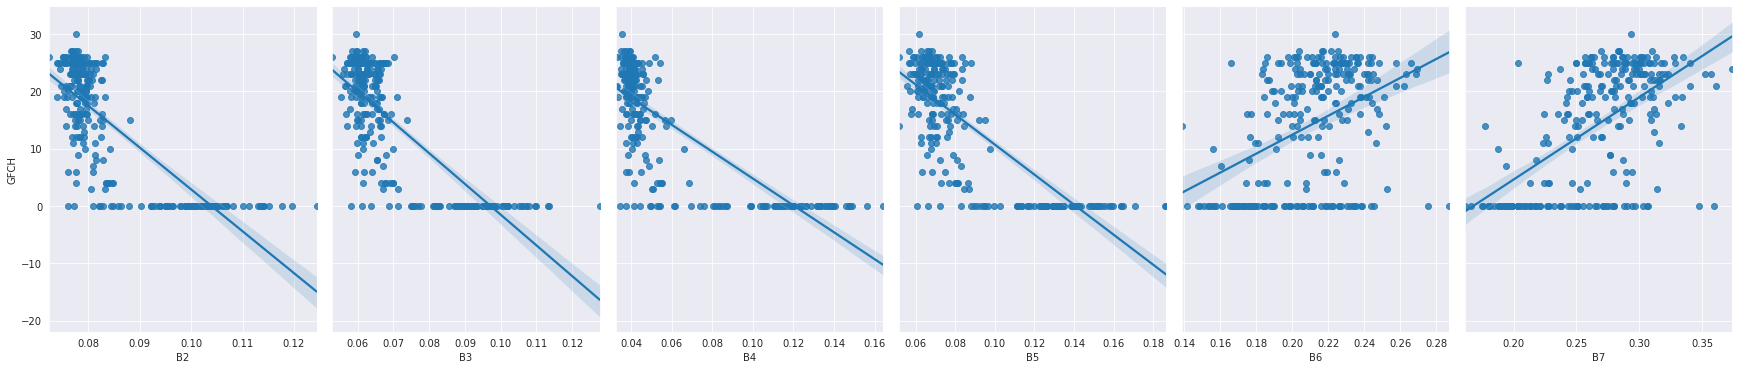

In [ ]:
sns.pairplot(df_points, x_vars=list_bands[0:6], y_vars=list_bands[-1],
             height=5, aspect=.8, kind="reg");

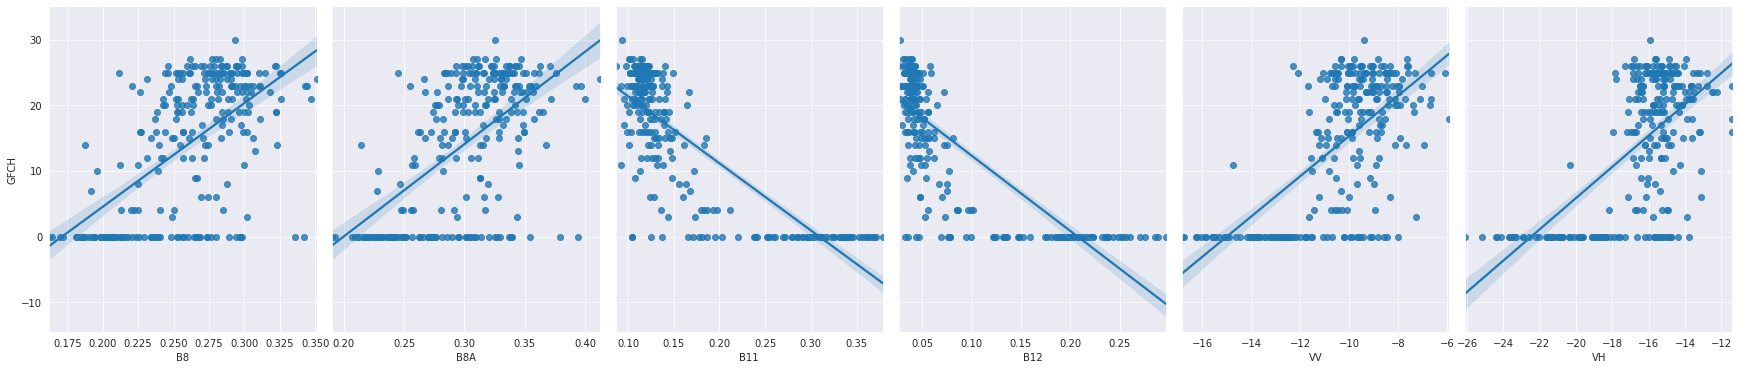

In [ ]:
sns.pairplot(df_points, x_vars=list_bands[6:-1], y_vars=list_bands[-1],
             height=5, aspect=.8, kind="reg");


In [ ]:
X = df_points[list_bands[0:-1]].values
y = df_points[list_bands[-1]].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_s = StandardScaler()
X_train = X_s.fit_transform(X_train)
X_test = X_s.fit_transform(X_test)

Linear Regression

In [ ]:
Linear_regressor = LinearRegression()  
Linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = Linear_regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.144123043675007
Mean Squared Error: 28.168273176052264
Root Mean Squared Error: 5.30737912495916


Text(0.5, 1.0, 'Linear Regression')

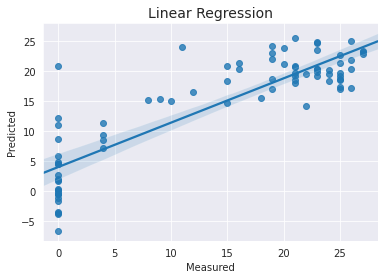

In [ ]:
lr_graph = sns.regplot(x=y_test, y=y_pred, truncate=False)
lr_graph.set(xlabel="Measured", ylabel = "Predicted")
lr_graph.set_title('Linear Regression', fontsize=14)

Huber Regression

In [ ]:
Huberregressor = HuberRegressor(max_iter=200, alpha=0.001)
Huberregressor.fit(X_train, y_train)

HuberRegressor(alpha=0.001, epsilon=1.35, fit_intercept=True, max_iter=200,
               tol=1e-05, warm_start=False)

In [ ]:
y_pred = Huberregressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.254860815944538
Mean Squared Error: 31.531554052562694
Root Mean Squared Error: 5.6152964349678545


Text(0.5, 1.0, 'Huber Regression')

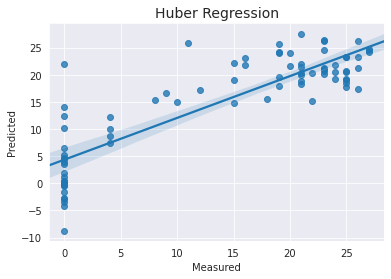

In [ ]:
lr_graph = sns.regplot(x=y_test, y=y_pred, truncate=False)
lr_graph.set(xlabel="Measured", ylabel = "Predicted")
lr_graph.set_title('Huber Regression', fontsize=14)

SVR rbf

In [ ]:
SVR_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
SVR_rbf.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = SVR_rbf.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
df.head()

,Actual,Predicted
0,4.0,4.570106
1,22.0,22.178910
2,8.0,16.120141
3,19.0,26.114990
4,21.0,19.052814


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.8639461470887526
Mean Squared Error: 19.11315747329627
Root Mean Squared Error: 4.371859727083689


Text(0.5, 1.0, 'SVR rbf Regression')

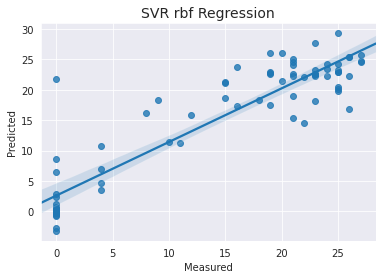

In [ ]:
lr_graph = sns.regplot(x=y_test, y=y_pred, truncate=False)
lr_graph.set(xlabel="Measured", ylabel = "Predicted")
lr_graph.set_title('SVR rbf Regression', fontsize=14)

SVR poly

In [ ]:
SVR_poly = SVR(kernel='poly', C=10, gamma='auto', degree=2, epsilon=.1, coef0=1)

In [ ]:
SVR_poly.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=1, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = SVR_poly.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.3720961495995825
Mean Squared Error: 22.9374255621529
Root Mean Squared Error: 4.78930324391272


Text(0.5, 1.0, 'SVR Poly Regression')

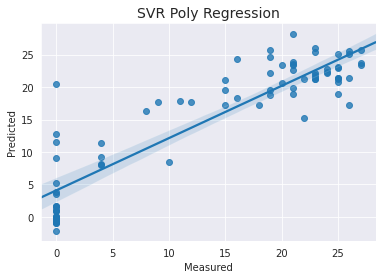

In [ ]:
lr_graph = sns.regplot(x=y_test, y=y_pred, truncate=False)
lr_graph.set(xlabel="Measured", ylabel = "Predicted")
lr_graph.set_title('SVR Poly Regression', fontsize=14)

Decision Tree Regressor

In [ ]:
DT_regressor = DecisionTreeRegressor(random_state = 10, min_samples_leaf = 1, max_depth=4)
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [ ]:
y_pred = DT_regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.905561665037472
Mean Squared Error: 22.295544854259347
Root Mean Squared Error: 4.721815842899779


Text(0.5, 1.0, 'Decision Tree Regression')

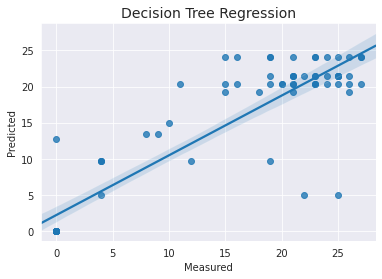

In [ ]:
lr_graph = sns.regplot(x=y_test, y=y_pred, truncate=False)
lr_graph.set(xlabel="Measured", ylabel = "Predicted")
lr_graph.set_title('Decision Tree Regression', fontsize=14)

Random Forest Regression

In [ ]:
RFR = RandomForestRegressor(n_estimators=500, max_depth=4, random_state=0)
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = RFR.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.7538124276247427
Mean Squared Error: 18.604005319123672
Root Mean Squared Error: 4.313236061140599


Text(0.5, 1.0, 'Random Forest Regression')

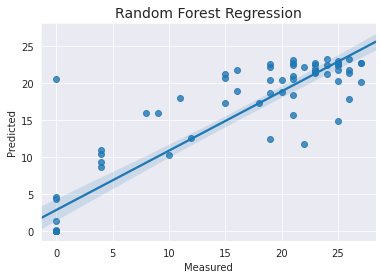

In [ ]:
lr_graph = sns.regplot(x=y_test, y=y_pred, truncate=False)
lr_graph.set(xlabel="Measured", ylabel = "Predicted")
lr_graph.set_title('Random Forest Regression', fontsize=14)

Gradient Booster Regressor

In [ ]:
GBR = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=0, loss='ls')
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = GBR.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.7485168370515076
Mean Squared Error: 17.931998416848433
Root Mean Squared Error: 4.234619040344531


Text(0.5, 1.0, 'Gradient Booster Regression')

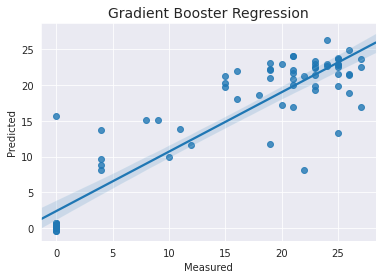

In [ ]:
lr_graph = sns.regplot(x=y_test, y=y_pred, truncate=False)
lr_graph.set(xlabel="Measured", ylabel = "Predicted")
lr_graph.set_title('Gradient Booster Regression', fontsize=14)

SGD Regressor

In [ ]:
SGDR = SGDRegressor(max_iter=1000, tol=1e-3)
SGDR.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
y_pred = SGDR.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.314918314820239
Mean Squared Error: 31.594556296238277
Root Mean Squared Error: 5.620903512446934


Text(0.5, 1.0, 'SGD Regression')

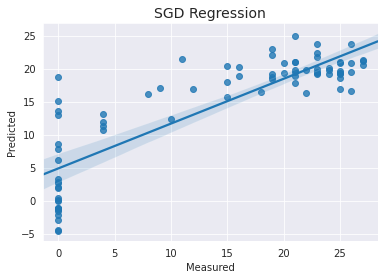

In [ ]:
lr_graph = sns.regplot(x=y_test, y=y_pred, truncate=False)
lr_graph.set(xlabel="Measured", ylabel = "Predicted")
lr_graph.set_title('SGD Regression', fontsize=14)

XGBoost Regression

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xg_reg = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=500,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xg_reg.fit(X_train,y_train)

[17:26:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             silent=None, subsample=0.6, verbosity=1)

In [ ]:
y_pred = xg_reg.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.7914707992225885
Mean Squared Error: 18.382494237017482
Root Mean Squared Error: 4.287481106316094


Text(0.5, 1.0, 'XGBoost Regression')

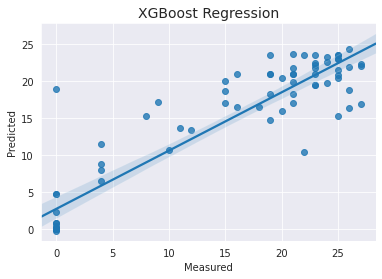

In [ ]:
lr_graph = sns.regplot(x=y_test, y=y_pred, truncate=False)
lr_graph.set(xlabel="Measured", ylabel = "Predicted")
lr_graph.set_title('XGBoost Regression', fontsize=14)

ANN Regression

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=12, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X_train, y_train, batch_size = 10, epochs = 500)

Epoch 1/500
19/19 [==============================] - 0s 1ms/step - loss: 307.2421
Epoch 2/500
19/19 [==============================] - 0s 1ms/step - loss: 306.6190
Epoch 3/500
19/19 [==============================] - 0s 1ms/step - loss: 305.7994
Epoch 4/500
19/19 [==============================] - 0s 1ms/step - loss: 303.9461
Epoch 5/500
19/19 [==============================] - 0s 1ms/step - loss: 299.3564
Epoch 6/500
19/19 [==============================] - 0s 1ms/step - loss: 288.1972
Epoch 7/500
19/19 [==============================] - 0s 1ms/step - loss: 265.2383
Epoch 8/500
19/19 [==============================] - 0s 1ms/step - loss: 220.1384
Epoch 9/500
19/19 [==============================] - 0s 1ms/step - loss: 155.8001
Epoch 10/500
19/19 [==============================] - 0s 1ms/step - loss: 87.7213
Epoch 11/500
19/19 [==============================] - 0s 1ms/step - loss: 53.5360
Epoch 12/500
19/19 [==============================] - 0s 1ms/step - loss: 47.4606
Epoch 13/500
19/

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.6591719267889857
Mean Squared Error: 16.88821870785468
Root Mean Squared Error: 4.109527796213901


Text(0.5, 1.0, 'ANN Regression')

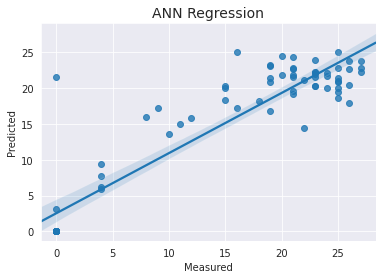

In [ ]:
lr_graph = sns.regplot(x=y_test, y=y_pred, truncate=False)
lr_graph.set(xlabel="Measured", ylabel = "Predicted")
lr_graph.set_title('ANN Regression', fontsize=14)